# 6.3 Geographical Visualizations with Python

## Contents:

1. Import Libraries
2. Import Data
4. Data Wrangling
5. Consistency Checks
6. Plotting Choropleth

## 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

## 2. Import Data

In [7]:
# create path for importing files

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Data Immersion/A6, Advanced Analythics & Dashboard Design/Achievement 6/09-2024 SA Road Crash Analysis'

# import json file for the South Australian suburbs

suburbs_file = os.path.join(path, '02 Data', 'Original Data', 'Suburbs_GDA2020.geojson')

# import merged dataframe for analysis

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_df.csv'))

## 3. Data Wrangling

In [9]:
# propt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [10]:
# drop Unnamed: 0 column

df.drop(columns='Unnamed: 0', inplace=True)

In [11]:
df.head()

,REPORT_ID,crash_stats_area,crash_suburb,crash_postcode,total_units,total_casualties,total_fatalities,total_serious_injuries,total_minor_injuries,crash_month,...,dui_involved,drugs_involved,accloc_x,accloc_y,unit_type,unit_registration_year,unit_controller_sex,unit_controller_age,unit_controller_licence_type,unit_number_of_occupants
0,2019-1-16/08/2024,2 Metropolitan,Hampstead Gardens,5086,2,0,0,0,0,June,...,N,N,1331810.03,1676603.26,Station Wagon,1998.0,Female,85.0,Full,1.0
1,2019-2-16/08/2024,2 Metropolitan,Dry Creek,5094,2,0,0,0,0,January,...,N,N,1328376.20,1682942.63,Motor Cars - Sedan,2002.0,Female,31.0,Full,1.0
2,2019-3-16/08/2024,2 Metropolitan,Mile End,5031,2,1,0,0,1,January,...,N,N,1325819.68,1670994.26,Motor Vehicle - Type Unknown,1937.0,Unknown,33.0,Unknown,1.0
3,2019-4-16/08/2024,2 Metropolitan,Paralowie,5108,2,1,0,1,0,January,...,N,N,1328320.60,1690237.08,Motor Cycle,2015.0,Male,21.0,Learners,1.0
4,2019-5-16/08/2024,2 Metropolitan,Mount Barker,5251,2,0,0,0,0,January,...,N,N,1353279.99,1655645.15,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# create list of needed columns

columns = ['crash_suburb', 'total_units', 'total_casualties', 'total_fatalities']

# create a subset

suburb_rec = df[columns]

In [13]:
suburb_rec.head()

,crash_suburb,total_units,total_casualties,total_fatalities
0,Hampstead Gardens,2,0,0
1,Dry Creek,2,0,0
2,Mile End,2,1,0
3,Paralowie,2,1,0
4,Mount Barker,2,0,0


In [14]:
# change values to uppercase to match the json file

suburb_rec.loc[:, 'crash_suburb'] = suburb_rec['crash_suburb'].str.upper()

In [15]:
# create column for total casualties and total units per suburb

suburb_rec = suburb_rec.assign(
    sum_casualties=suburb_rec.groupby('crash_suburb')['total_casualties'].transform('sum'),
    sum_units=suburb_rec.groupby('crash_suburb')['total_units'].transform('sum')
)

In [16]:
suburb_rec.head()

,crash_suburb,total_units,total_casualties,total_fatalities,sum_casualties,sum_units
0,HAMPSTEAD GARDENS,2,0,0,31,223
1,DRY CREEK,2,0,0,96,636
2,MILE END,2,1,0,77,465
3,PARALOWIE,2,1,0,96,557
4,MOUNT BARKER,2,0,0,192,974


## 4. Consistency Checks

In [18]:
# check for nan values

suburb_rec.isnull().sum()

crash_suburb        0
total_units         0
total_casualties    0
total_fatalities    0
sum_casualties      0
sum_units           0
dtype: int64

In [19]:
# drop the rows with nan values

suburb_rec = suburb_rec.dropna()

In [20]:
# convert values to integers

suburb_rec[['total_units', 'total_casualties', 'total_fatalities', 'sum_casualties', 'sum_units']] = suburb_rec[['total_units', 'total_casualties', 'total_fatalities', 'sum_casualties', 'sum_units']].astype(int)

<Axes: xlabel='sum_casualties', ylabel='Count'>

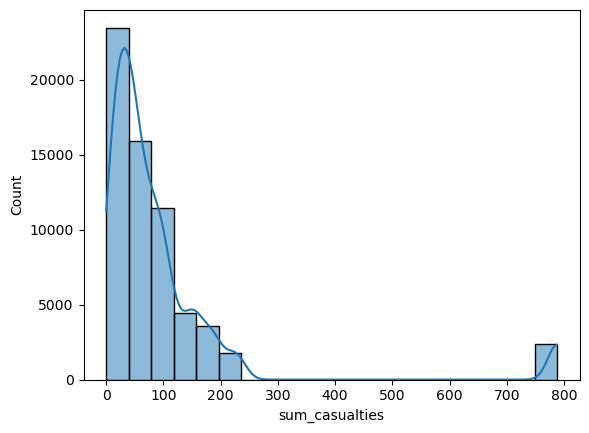

In [21]:
# check for extreme values

sns.histplot(suburb_rec['sum_casualties'], bins=20, kde = True)

In [22]:
# keep only non-zero values

suburb_rec = suburb_rec[suburb_rec['sum_casualties'] >= 1]

## 5. Plotting Choropleth

In [24]:
# create dataframe with the variables needed for mapping

data_to_plot = suburb_rec[['crash_suburb', 'sum_casualties']]
data_to_plot.head()

,crash_suburb,sum_casualties
0,HAMPSTEAD GARDENS,31
1,DRY CREEK,96
2,MILE END,77
3,PARALOWIE,96
4,MOUNT BARKER,192


In [25]:
# create folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = suburbs_file, 
    data = data_to_plot,
    columns = ['crash_suburb','sum_casualties'],
    key_on = 'feature.properties.suburb',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Casualties").add_to(map)
folium.LayerControl().add_to(map)

#map

In [26]:
# save the map

#map.save('casualties_per_suburb.html')